# setup and imports

In [1]:
import fnmatch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from ipywidgets import interactive
import numpy as np
import os
import glob
from scipy.ndimage import gaussian_filter as smooth
import platform

%run sessionlists
from VIGOR_utils import *
from VIGOR_plotting import *
from VIGOR_MODELS_Functions import *

plt.style.use('./Figures/paper.mplstyle')

In [2]:
#### Define folder with data 
if platform.system()=='Linux':
    root="/home/david/Desktop/ALLDATA"
    savePath="/home/david/Desktop/Save"
elif platform.system()=='Darwin':
    root="/Users/tom/Desktop/DATA"
    savePath="/Users/tom/Desktop/Save"
if 'COLAB_GPU' in os.environ:
    !gdown --id 1BSepSzm1-KQJlUvv8C23p_qyHvtzvrZ8
    !unzip -qq /content/code/sequencesALLDATA.zip
    root="/content/code/sequencesALLDATA"
    savePath="/content/Save"
    print("I'm running on Colab")
print("Path to data is: %s"%root)

retval = os.getcwd()
print("Current working directory: %s" % retval)
print("Save Path: ", savePath)

print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /Users/tom/Desktop/DATA
Current working directory: /Users/tom/test1/code
Save Path:  /Users/tom/Desktop/Save
Found 8 rats in the data folder


In [3]:
rat_markers = {}
sequence = {}

# define brain status (lesion/CNO/intact) for each rat, used in plots
# needs to be properly implemented, setting is in behav_params for each session.
brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal',
               'RatF32': 'normal', 'RatF33': 'normal',
               'RatM31': 'normal', 'RatM32': 'normal',
                'RatF42': 'normal', 'RatM40': 'normal', 'RatM43': 'normal',
                'RatF50': 'DMS', 'RatF51': 'DLS', 'RatF52': 'DLS',
               'RatM50': 'DMS', 'RatM51': 'DMS', 'RatM52': 'DLS', 'RatM53': 'normal', 'RatM54': 'normal'}

markers = {'normal': 'o', 'thcre': 'd', 'lesion': 'x', 'biglesion': 'X'}
lines = {'normal': '-', 'thcre': '--', 'lesion': ':', 'biglesion': '-.'}

# define list of rats to be analyzed

# INTACT RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43', 
            'RatM53', 'RatM54']


for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=['silver', 'o', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=['silver', 'o', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

    if animal == 'RatM00':
        rat_markers[animal][0] = 'dodgerblue'
        
    for session in sorted(matchsession(animal, dist60+dist90+dist120 + TM20+TM10+TM2+TMrev2+TMrev10+TMrev20)):

        biglesion = True if 'L' in session else False
        sequence[animal, session] = get_from_pickle(root, animal[0:6], session, name="sequence.p", biglesion=biglesion)

 

Loading data for RatF00
no pickle found RatF00_2021_07_18_10_36_33
no pickle found RatF00_2021_07_18_15_09_13
no pickle found RatF00_2021_07_19_15_25_33
no pickle found RatF00_2021_07_20_10_09_39
no pickle found RatF00_2021_07_20_15_10_08
no pickle found RatF00_2021_07_21_10_43_27
no pickle found RatF00_2021_07_21_15_19_33
no pickle found RatF00_2021_07_22_11_23_48
no pickle found RatF00_2021_07_22_16_11_45
no pickle found RatF00_2021_07_23_10_38_43
no pickle found RatF00_2021_07_23_15_04_12
no pickle found RatF00_2021_07_24_10_49_55
no pickle found RatF00_2021_07_24_15_28_05
no pickle found RatF00_2021_07_25_10_54_14
no pickle found RatF00_2021_07_25_15_38_20
no pickle found RatF00_2021_07_26_10_23_57
no pickle found RatF00_2021_07_26_15_17_06
no pickle found RatF00_2021_08_03_10_23_20
no pickle found RatF00_2021_08_03_15_41_26
no pickle found RatF00_2021_08_04_10_05_18
no pickle found RatF00_2021_08_04_15_43_24
no pickle found RatF00_2021_08_05_10_29_33
no pickle found RatF00_2021_08

no pickle found RatF01_2021_08_10_16_42_38
no pickle found RatF01_2021_08_11_11_42_10
no pickle found RatF01_2021_08_11_16_35_02
no pickle found RatF01_2021_08_12_11_37_39
no pickle found RatF01_2021_08_12_16_46_09
no pickle found RatF01_2021_08_13_11_30_45
no pickle found RatF01_2021_08_13_16_45_13
no pickle found RatF01_2021_08_14_11_37_37
no pickle found RatF01_2021_08_14_16_33_08
no pickle found RatF01_2021_08_15_11_53_04
no pickle found RatF01_2021_08_15_16_51_02
no pickle found RatF01_2021_08_16_11_35_22
no pickle found RatF01_2021_08_16_16_41_43
no pickle found RatF01_2021_08_17_11_20_34
no pickle found RatF01_2021_08_17_16_30_55
Loading data for RatF02
no pickle found RatF02_2021_07_18_12_38_36
no pickle found RatF02_2021_07_18_17_11_30
no pickle found RatF02_2021_07_19_12_11_07
no pickle found RatF02_2021_07_19_17_28_24
no pickle found RatF02_2021_07_20_12_13_07
no pickle found RatF02_2021_07_20_17_12_04
no pickle found RatF02_2021_07_21_12_46_49
no pickle found RatF02_2021_07

In [4]:
def round_nearest(x, a=0.04):
    return np.around(x / a) * a

def generate_running_time(loc, scale, N=1):
    u = np.random.uniform(0, 1, int(N))
    res = np.tan(np.pi * (u - 0.5)) * scale + loc
    return round_nearest(res)

TypeError: object of type 'NoneType' has no len()

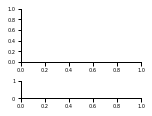

In [5]:
# crssing time first 10 min, all reward history pooled

def plot_mu(ax=None):
    if ax is None: 
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    animal='RatM00'
    session='RatM00_2021_07_22_16_13_03'

    crossingtimes = prepare_data_running_times(sequence, [animal], [session])
    # crossingtimes = crossingtimes[animal][0][0]
    crossingtimes = [item for sublist in prepare_data_running_times(sequence, [animal], [session])[animal][0] for item in sublist]

    bins=np.linspace(0.5, 5, 125)
    ydata, xdata, _ = ax.hist(crossingtimes, bins=bins,
                    color='k', zorder=10, lw=.5,
                    #density=True,
                    weights=np.ones_like(crossingtimes) / len(crossingtimes),
                    histtype="step")
    
    x = np.linspace(0.5, 5, 1000)
    p = stats.cauchy.fit(crossingtimes)
    y = stats.cauchy.pdf(x, *p) /25
    ax.plot(x, y, color=plt.get_cmap('winter')(0), zorder=4, lw=0.5)

    ax.set_xlim(0.5, 2.5)
    ax.set_xticks([0.5, 1.5, 2.5])
    ax.set_ylim(0, .2)
    ax.set_yticks([0, .1, .2])
    ax.set_xlabel('Crossing duration (s)')
    ax.set_ylabel('PDF')


    x_peak = x[np.argmax(y)]
    y_peak = y[np.argmax(y)]

    # mu arrow
    ax.annotate(text='', xy=(x_peak, y_peak), xytext=(x_peak, y_peak+.04), arrowprops=dict(arrowstyle='->', lw=0.75), fontsize=5, zorder=5)
    ax.annotate(text=r'$\mu$', xy=(x_peak, y_peak), xytext=(x_peak, y_peak+.05), ha='center', va='center',
                xycoords='data', fontsize=7, zorder=5)
    
    half_max = np.max(y)/2
    idx = np.argwhere(np.diff(np.sign(y - half_max))).flatten()
    ax.annotate(text='', xy=(x[idx[0]], half_max), xytext=(x[idx[-1]], half_max), arrowprops=dict(arrowstyle='<->', lw=0.75, shrinkA=0, shrinkB=0), fontsize=5, zorder=5)
    ax.annotate(text=r'$\sigma$', xy=(x_peak, y_peak/2), xytext=(x_peak, y_peak/2), ha='center', va='top',
                xycoords='data', fontsize=7, zorder=5)
    space_axes(ax)

def equ_mu(ax=None):
    if ax is None: 
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    ax.axis("off")
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.text(s=r'$\mu = \mu_0 + \mu_t \times t + \mu_R \times R$', x=0, y=.5, ha="center", va="center", fontsize=6)
    


fig, axs = plt.subplots(2, 1, figsize=(2, 1.5), gridspec_kw={'height_ratios': [3, 1]})
plot_mu(axs[0])
equ_mu(axs[1])

# 2A $\mu_0$

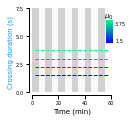

In [6]:
# plot variable median/mean fir each block
def Figure2A(ax=None):
    if ax is None:
        ax = plt.gca()

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]

    dummy_data = [2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25]
    modifs = [-0.75, 0, 0.75, 1.5]
    
    cmap = plt.get_cmap('winter', len(modifs))
    for idx, modif in enumerate(modifs):
        ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
                [dummy_data[i] + modif for i in range(0, len(blocks))],
                color=cmap(idx), ls='--')

    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)
    
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Crossing duration (s)", color='dodgerblue')
    ax.set_xlim(0, 60)
    ax.set_ylim(0, 7.5)
    ax.set_yticks([0, 2.5, 5, 7.5])
    space_axes(ax)


fig, ax = plt.subplots(1, 1, figsize=(cm2inch(4), cm2inch(4)))
Figure2A(ax=ax)


l, b, h, w = 0.9, .65, 0.2, 0.06
ax1 = fig.add_axes([l, b, w, h])

plot_colorbar(ax=ax1, fig=fig, label=r'$\mu_0$', cmap='winter', labels=[1.5, 0, 3.75])

# 2B $\mu_t$

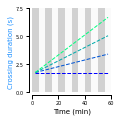

In [7]:
# plot variable median/mean fir each block
def Figure2B(ax=None):

    if ax is None:
        ax = plt.gca()

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]

    dummy_data = [1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75]
    modifs = [0, 0.15, .3, .45]
    cmap = plt.get_cmap('winter', len(modifs))
    
    for idx, modif in enumerate(modifs):
        ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
                [dummy_data[i] + (i*modif) for i in range(0, len(blocks))],
                color=cmap(idx), ls='--')

    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)
    
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Crossing duration (s)", color='dodgerblue')
    ax.set_xlim(0, 60)
    ax.set_ylim(0, 7.5)
    ax.set_yticks([0, 2.5, 5, 7.5])
    space_axes(ax)


fig, ax = plt.subplots(1, 1, figsize=(cm2inch(4), cm2inch(4)))
Figure2B(ax=ax)

# 2C $\mu_R$

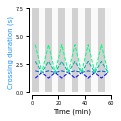

In [8]:
# plot variable median/mean fir each block
def Figure2C(ax=None):

    if ax is None:
        ax = plt.gca()

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]

    # dummy_data = [1.75, 2.7, 1.75, 2.75, 1.75, 2.75, 1.75, 2.7, 1.75, 2.75, 1.75, 2.80]

    dummy_data = [1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75]
    modifs = [-.5, .15, 1, 2.5]
    cmap = plt.get_cmap('winter', len(modifs))

    for idx, modif in enumerate(modifs):
        
        ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
                [dummy_data[i] + modif if i % 2 == 0 else dummy_data[i] for i in range(0, len(blocks)) ],
                color=cmap(idx), ls='--')

    
    dummy_data = [1.25, 1.7, 1.2, 1.75, 1.2, 1.75, 1.25, 1.7, 1.30, 1.75, 1.25, 1.80]
 
    
    dummy_data = [1.25, 4.2, 1.2, 4.25, 1.2, 4.25, 1.25, 4.2, 1.30, 4.25, 1.25, 4.30] 


    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)

    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Crossing duration (s)", color='dodgerblue')
    ax.set_xlim(0, 60)
    ax.set_ylim(0, 7.5)
    ax.set_yticks([0, 2.5, 5, 7.5])
    space_axes(ax)

fig, ax = plt.subplots(1, 1, figsize=(cm2inch(4), cm2inch(4)))
Figure2C(ax=ax)

# 2D model + data

no pickle found RatM00_2021_07_22_16_13_03


TypeError: 'NoneType' object is not subscriptable

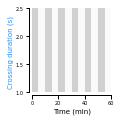

In [9]:
# plot variable median/mean fir each block
def Figure2D(ax=None):
    if ax is None:
        ax = plt.gca()

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]

    dummy_data = [1.25, 2.25, 1.5, 2.75, 2, 3.5, 2.4, 4.2, 3.2, 5.2, 3.5, 6.3]
    # ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
    #         [dummy_data[i] for i in range(0, len(blocks))],  # or use median
    #         # marker='o', ms=3, 
    #         color='dodgerblue', 
    #         zorder=4, markeredgecolor='k', markeredgewidth=0.5,
    #         ls='--', label='Synthetic data')
    
    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)
    
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Crossing duration (s)", color='dodgerblue')
    ax.set_xlim(0, 60)
    ax.set_ylim(1, 2.5)
    ax.set_yticks([1, 1.5, 2, 2.5])
    space_axes(ax)


    # experimental rat data

    root = "/home/david/Desktop/ALLDATA"
    animal='RatM00'
    session='RatM00_2021_07_22_16_13_03'

    _params = get_from_pickle(root, animal, session, name="params.p")
    blocks = _params['blocks']
    rewardProbaBlock = _params['rewardProbaBlock']
    example_runningTimeInLeftBin, example_runningTimeInRightBin = get_from_pickle(root, animal, session, name="timeRun.p")
    data = [example_runningTimeInLeftBin[i]+example_runningTimeInRightBin[i] for i in range(0, 12)]

    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
            [np.median(data[i]) for i in range(0, len(blocks))],  # or use median
            marker='o', ms=3, color='dodgerblue', 
            zorder=4, markeredgecolor='k', markeredgewidth=0.5, alpha=1, label='Example rat')


    # fit, generate samples from distribution with fit parameters, take median
    N_bins = 6
    N_avg = 4
    ex_mu, ex_mu_t, ex_mu_R, ex_sigma, ex_sigma_t, ex_sigma_R = pickle.load(open("picklejar/crossing_time_fit_example_session.p", "rb"))
    print(ex_mu, ex_mu_t, ex_mu_R, ex_sigma, ex_sigma_t, ex_sigma_R)
    MU = np.zeros((N_bins, N_avg))
    SIGMA = np.zeros((N_bins, N_avg))

    for bin in range(N_bins):
        for avg in range(N_avg):
            MU[bin, avg] = ex_mu + bin*ex_mu_t + avg*ex_mu_R
            SIGMA[bin, avg] = ex_sigma + bin*ex_sigma_t + avg*ex_sigma_R

    m = []
    s = []
    for i in range(6):
        m.append((.9*MU[i][0] + 0.1*MU[i][1]))
        m.append((.9*MU[i][-1] + 0.1*MU[i][-2]))
        s.append((.9*SIGMA[i][0] + 0.1*SIGMA[i][1]))
        s.append((.9*SIGMA[i][-1] + 0.1*SIGMA[i][-2]))

    res = [np.median(generate_running_time(m[i], 0*s[i], 1000)) for i in range(12)]
    
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [res[i] for i in range(0, len(blocks))],
            color='k', ls='--', label='Example rat fit', zorder=5)


    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper left', bbox_to_anchor=(0.01, 0.99), frameon=True, fontsize=5, markerscale=1, edgecolor='k', facecolor='w').get_frame().set_linewidth(.5)


fig, ax = plt.subplots(1, 1, figsize=(cm2inch(4), cm2inch(4)))
Figure2D(ax=ax)

# 2E schematic distance

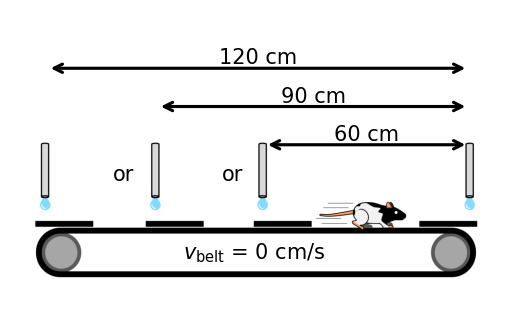

In [ ]:
def Figure2E(ax=None, path=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    if path is None:
        path = "/home/david/Desktop/code/Figures/2Drun.png"

    img = plt.imread(path)
    img = img[300:2000, 150:3075]
    ax.imshow(img)
    ax.axis("off")
    ax.text(s=r'$v_{\mathrm{belt}}$ = 0 cm/s', x=img.shape[1]/2, y=1460, ha="center", va="center", fontsize=5)
    ax.text(s='or', x=610, y=950, ha="center", va="center", fontsize=5)
    ax.text(s='or', x=1325, y=950, ha="center", va="center", fontsize=5)

    ax.annotate(text='', xy=(1500, 750), xytext=(2900, 750), arrowprops=dict(arrowstyle='<->', lw=0.75), fontsize=5, zorder=5)
    ax.annotate(text='60 cm', xy=(0, 0), xytext=((1500+2900)/2, 750), ha='center', va='bottom', xycoords='data', fontsize=5, zorder=5)
    ax.annotate(text='', xy=(800, 500), xytext=(2900, 500), arrowprops=dict(arrowstyle='<->', lw=0.75), fontsize=5, zorder=5)
    ax.annotate(text='90 cm', xy=(0, 0), xytext=((800+2900)/2, 500), ha='center', va='bottom', xycoords='data', fontsize=5, zorder=5)
    ax.annotate(text='', xy=(80, 250), xytext=(2900, 250), arrowprops=dict(arrowstyle='<->', lw=0.75), fontsize=5, zorder=5)
    ax.annotate(text='120 cm', xy=(0, 0), xytext=((80+2900)/2, 250), ha='center', va='bottom', xycoords='data', fontsize=5, zorder=5)

fig, ax = plt.subplots(1, 1, figsize=(cm2inch(4), cm2inch(4)))
Figure2E(ax=ax)

# 2FGH fit result dist

In [50]:
def permutation_test_distances(var, ax=None, num_permutations=10000):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    data = np.array([[var[animal][cond] for cond in ['60', '90', '120']] for animal in animalList])
    p_value_60_90 = exact_mc_perm_test(data[:, 0], data[:, 1])
    p_value_60_120 = exact_mc_perm_test(data[:, 0], data[:, 2])
    p_value_90_120 = exact_mc_perm_test(data[:, 1], data[:, 2])

    print(f'p_value_60_90: {p_value_60_90}', f'p_value_60_120: {p_value_60_120}', f'p_value_90_120: {p_value_90_120}')
    h = np.min([np.min(data[:, 0]), np.min(data[:, 1]), np.min(data[:, 2])])
    barplot_annotate_brackets(ax, 0, 1, stars(p_value_60_90), [0, 1, 2], [h, h, h], dh=-0.05, barh=-.05, maxasterix=None)
    barplot_annotate_brackets(ax, 0, 2, stars(p_value_60_120), [0, 1, 2], [h, h, h], dh=-0.15, barh=-.05, maxasterix=None)
    barplot_annotate_brackets(ax, 1, 2, stars(p_value_90_120), [0, 1, 2], [h, h, h], dh=-0.05, barh=-.05, maxasterix=None)

def permutation_test_vbelt(var, ax=None, num_permutations=10000):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    data = np.array([[var[animal][cond] for cond in ['20', '2', 'rev20']] for animal in animalList])
    p_value_20_2 = exact_mc_perm_test(data[:, 0], data[:, 1])
    p_value_2_rev20 = exact_mc_perm_test(data[:, 0], data[:, 2])
    p_value_20_rev20 = exact_mc_perm_test(data[:, 1], data[:, 2])

    print(f'p_value_20_0: {p_value_20_2}', f'p_value_0_rev20: {p_value_2_rev20}', f'p_value_20_rev20: {p_value_20_rev20}')
    h = np.min([np.min(data[:, 0]), np.min(data[:, 1]), np.min(data[:, 2])])
    barplot_annotate_brackets(ax, 0, 1, stars(p_value_20_2), [0, 2, 4], [h, h, h], dh=-0.05, barh=-.05, maxasterix=None)
    barplot_annotate_brackets(ax, 0, 2, stars(p_value_2_rev20), [0, 2, 4], [h, h, h], dh=-0.15, barh=-.05, maxasterix=None)
    barplot_annotate_brackets(ax, 1, 2, stars(p_value_20_rev20), [0, 2, 4], [h, h, h], dh=-0.05, barh=-.05, maxasterix=None)



p_value_60_90: 0.0 p_value_60_120: 0.0 p_value_90_120: 0.0


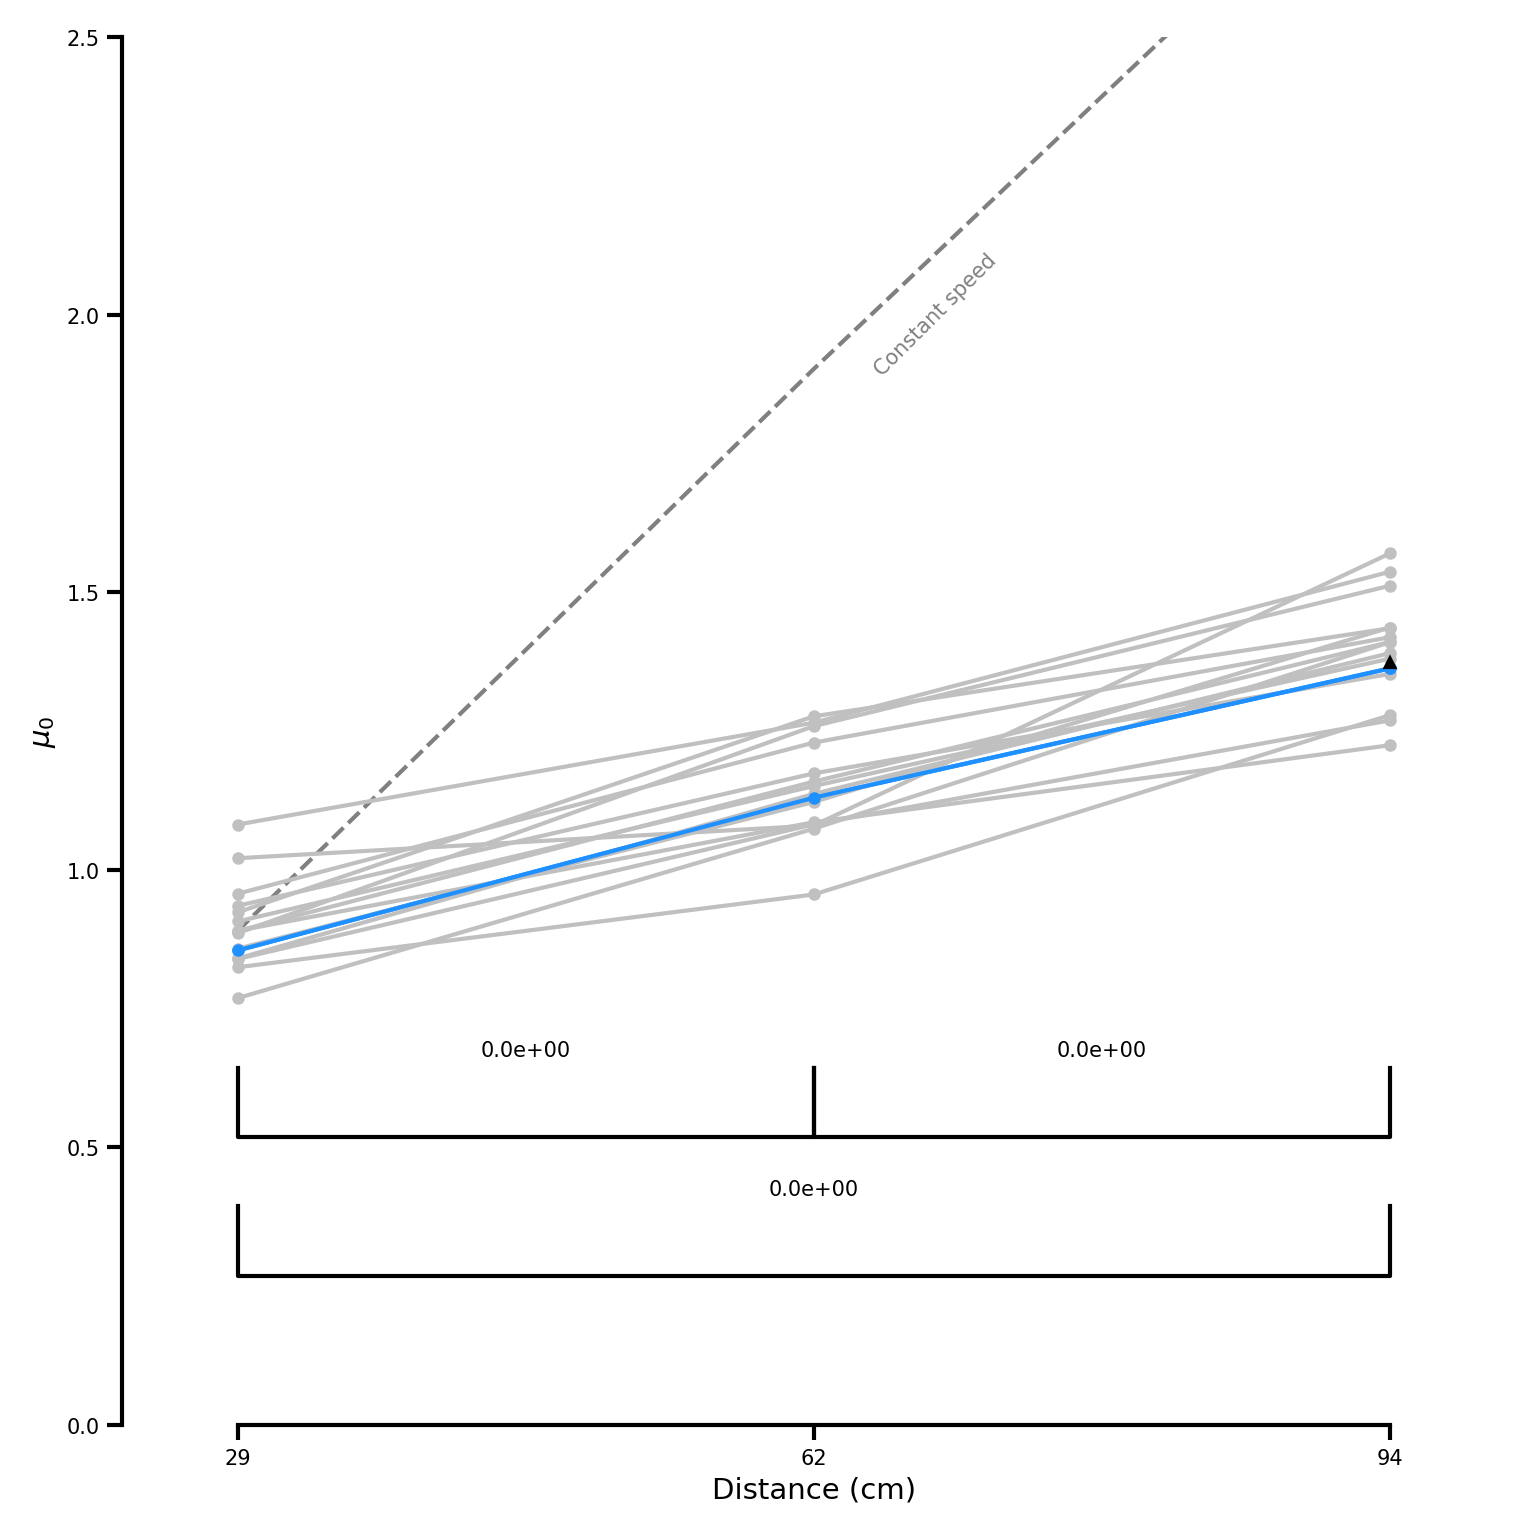

In [54]:
def barplot_annotate_brackets(ax, num1, num2, data, center, height, dh=.05, barh=.05, textbarh=.05, fs=5, maxasterix=3):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    text = stars(data, maxasterix)

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    ax_y0, ax_y1 = ax.get_ylim()
    dh *= abs(ax_y1 - ax_y0)
    barh *= abs(ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+textbarh)

    ax.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom' if barh > 0 else 'top')
    if fs is not None:
        if '*' in text:
            kwargs['fontsize'] = 7
        kwargs['fontsize'] = fs

    ax.text(*mid, text, **kwargs)
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=300)
Figure2F(ax=ax)

In [11]:
def plotmedian(var, ax=None, dist_or_tm='dist', do=False):
    if do:
        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(cm2inch(4), cm2inch(4)))
        if dist_or_tm == 'dist':
            ax.plot([0, 1, 2], [np.median([var[animal]["60"] for animal in animalList]), 
                                np.median([var[animal]["90"] for animal in animalList]),
                                np.median([var[animal]["120"] for animal in animalList])],
                                color='k', label=f'Median (n={len(animalList)})')
        elif dist_or_tm == 'tm':
            ax.plot([0, 1, 2, 3, 4], [np.median([var[animal]["20"] for animal in animalList]), 
                                np.median([var[animal]["10"] for animal in animalList]),
                                np.median([var[animal]["2"] for animal in animalList]),
                                np.median([var[animal]["rev10"] for animal in animalList]),
                                np.median([var[animal]["rev20"] for animal in animalList])],
                                color='k')
        

p_value_60_90: 0.0 p_value_60_120: 0.0 p_value_90_120: 0.0
p_value_60_90: 0.0027 p_value_60_120: 0.0263 p_value_90_120: 0.8611
p_value_60_90: 0.1173 p_value_60_120: 0.2891 p_value_90_120: 0.9852


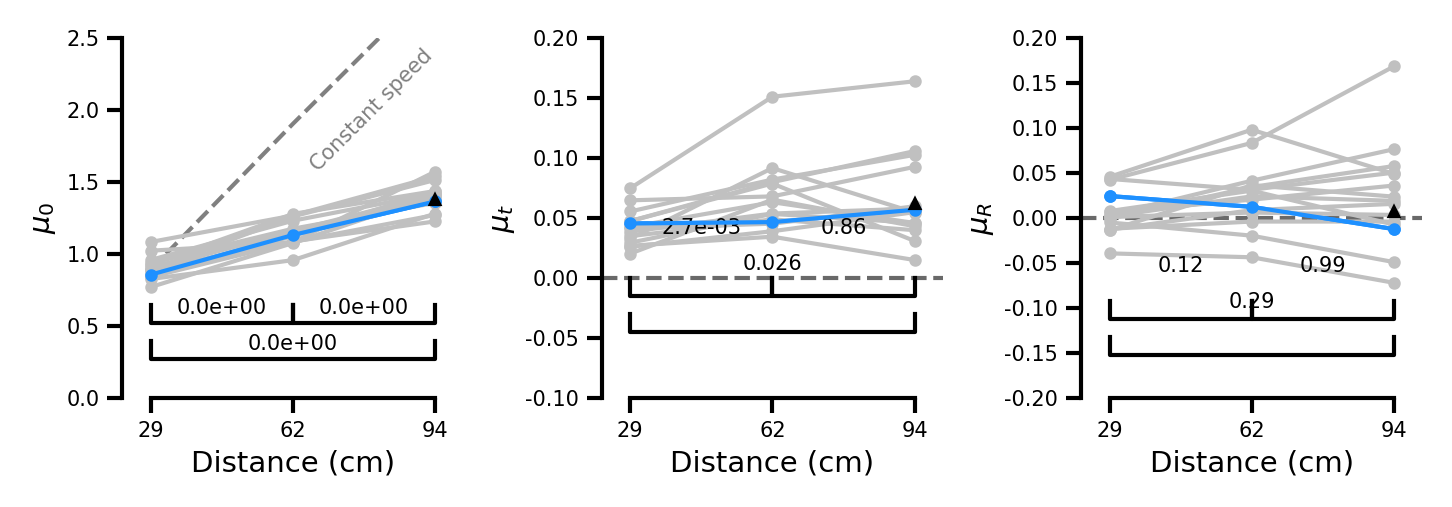

In [55]:
def Figure2F(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    # ax.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5, zorder=0)

    _, _, _, _, _, _, mu_0, _, _, _, _, _ = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [mu_0[animal]["60"], mu_0[animal]["90"], mu_0[animal]["120"]], 
                        color=rat_markers[animal][0], marker=rat_markers[animal][1], 
                        markersize=2, linestyle=lines[brainstatus[animal]])
        
        if animal == 'RatM00':
            ax.plot([0, 1, 2], [mu_0[animal]["60"], mu_0[animal]["90"], mu_0[animal]["120"]], 
                        color=rat_markers[animal][0], marker=rat_markers[animal][1], 
                        markersize=2, linestyle=lines[brainstatus[animal]], zorder=5)

    
    ex_mu, ex_mu_t, ex_mu_R, ex_sigma, ex_sigma_t, ex_sigma_R = pickle.load(open("picklejar/crossing_time_fit_example_session.p", "rb"))
    ax.plot(2, ex_mu, color='black', marker='^', zorder=10, markersize=2, linewidth=0)
    
    
    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    ax.set_xlabel("Distance (cm)")

    ax.set_ylim(0, 2.5)
    ax.set_ylabel(r'$\mu_0$')
    space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1)

    avg60 = np.median([mu_0[animal]["60"] for animal in animalList])
    ax.plot([0, 1, 2], [avg60, (62/29)*avg60, (94/29)*avg60], color='gray', linestyle='--', linewidth=1, alpha=1, zorder=0,)
    ax.text(s='Constant speed', x=1.1, y=2, ha="left", va="center", fontsize=5, color='gray', rotation=45)

    plotmedian(mu_0, ax=ax, dist_or_tm='dist')
    permutation_test_distances(mu_0, ax=ax, num_permutations=10000)
    
        
def Figure2G(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, mu_t, _, _, _, _ = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [mu_t[animal]["60"], mu_t[animal]["90"], mu_t[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=2, linestyle=lines[brainstatus[animal]])

        if animal == 'RatM00':
            ax.plot([0, 1, 2], [mu_t[animal]["60"], mu_t[animal]["90"], mu_t[animal]["120"]], 
                            color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                            markersize=2, linestyle=lines[brainstatus[animal]], zorder=10)
    
    ex_mu, ex_mu_t, ex_mu_R, ex_sigma, ex_sigma_t, ex_sigma_R = pickle.load(open("picklejar/crossing_time_fit_example_session.p", "rb"))
    ax.plot(2, ex_mu_t, color='black', marker='^', zorder=10, markersize=2, linewidth=0)
    
    
    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    ax.set_xlabel("Distance (cm)")

    ax.set_ylim(-0.1, .2)
    ax.set_ylabel(r'$\mu_t$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, alpha=1, zorder=0)
    space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_t, ax=ax, dist_or_tm='dist')
    permutation_test_distances(mu_t, ax=ax, num_permutations=10000)


def Figure2H(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, mu_R, _, _, _ = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [mu_R[animal]["60"], mu_R[animal]["90"], mu_R[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=2, linestyle=lines[brainstatus[animal]])
        
        if animal == 'RatM00':
            ax.plot([0, 1, 2], [mu_R[animal]["60"], mu_R[animal]["90"], mu_R[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=2, linestyle=lines[brainstatus[animal]], zorder=10)


    ex_mu, ex_mu_t, ex_mu_R, ex_sigma, ex_sigma_t, ex_sigma_R = pickle.load(open("picklejar/crossing_time_fit_example_session.p", "rb"))
    ax.plot(2, ex_mu_R, color='black', marker='^', zorder=10, markersize=2, linewidth=0)
    


    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    ax.set_xlabel("Distance (cm)")

    ax.set_ylim(-.2, .2)
    ax.set_ylabel(r'$\mu_R$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, alpha=1, zorder=0)
    space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_R, ax=ax, dist_or_tm='dist')
    permutation_test_distances(mu_R, ax=ax, num_permutations=10000)

fig, axs = plt.subplots(1, 3, figsize=(cm2inch(12), cm2inch(4)), dpi=300)
Figure2F(axs[0])
Figure2G(axs[1])
Figure2H(axs[2])

# 2I mean run speed Distance

TypeError: 'NoneType' object is not iterable

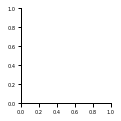

In [56]:
def Figure2I(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    conds = ["60", "90", "120"]
    run_speeds = {k: {a: [] for a in conds} for k in animalList}
    run_speeds2 = {k: {a: [] for a in conds} for k in animalList}

    for cond, sessionlist in zip(conds, [dist60, dist90, dist120]):
        for animal in animalList:
            for session in matchsession(animal, sessionlist):
                params = get_from_pickle(root, animal, session, name="params.p")
                for elem in sequence[animal, session]:
                    if get_block(sequence[animal, session][elem][0]) <= 1:
                        if sequence[animal, session][elem][1] == 'run':
                            tm_speed = params['treadmillSpeed'][get_block(sequence[animal, session][elem][0])]
                            run_speeds[animal][cond].append(abs(sequence[animal, session][elem][-1]) - tm_speed)

    for animal in animalList:
        for cond in conds:
            run_speeds2[animal][cond] = np.median(run_speeds[animal][cond])

    permutation_test_distances(run_speeds2, ax=ax, num_permutations=10000)
    # effect_of_condition(run_speeds2, conds=['60', '90', '120'], name='runspeed')

    for animal in animalList:
        ax.plot([0, 1, 2], [np.median(run_speeds[animal][cond]) for cond in conds], color=rat_markers[animal][0],
                marker=rat_markers[animal][1], markersize=2, label=f'Individuals (n={len(animalList)})')

        if animal == "RatM00":
            pickle.dump([np.median(run_speeds[animal][cond]) for cond in conds], open("picklejar/example_rat_run_speeds_dist.p", "wb"))
            ax.plot([0, 1, 2], [np.median(run_speeds[animal][cond]) for cond in conds], color=rat_markers[animal][0],
                    marker=rat_markers[animal][1], markersize=2, zorder=10, label='Example rat')

    animal='RatM00'
    session='RatM00_2021_07_22_16_13_03'
    example_session_run_speeds = []
    params = get_from_pickle(root, animal, session, name="params.p")
    for elem in sequence[animal, session]:
        if get_block(sequence[animal, session][elem][0]) <= 1:
            if sequence[animal, session][elem][1] == 'run':
                tm_speed = params['treadmillSpeed'][get_block(sequence[animal, session][elem][0])]
                example_session_run_speeds.append(abs(sequence[animal, session][elem][-1]) - tm_speed)

    ax.plot(2, np.median(example_session_run_speeds), color='black', marker='^', zorder=10, markersize=2, linewidth=0, label='Example session')
    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    ax.set_xlabel("Distance (cm)")


    ax.set_ylim(20, 120)
    ax.set_yticks([20, 40, 60, 80, 100, 120])
    ax.set_ylabel("Crossing speed (cm/s)")
    plotmedian(run_speeds2, ax=ax, dist_or_tm='dist')

    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper left', bbox_to_anchor=(0.01, 0.99), 
                                frameon=True, fontsize=5, markerscale=1, 
                                edgecolor='k', facecolor='w', 
                                # title='Legend for all figures:     ', title_fontsize=5
                                ).get_frame().set_linewidth(.5)



    space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1)
    

fig, ax = plt.subplots(1, 1, figsize=(cm2inch(4), cm2inch(4)))
Figure2I(ax=ax)

# 2J schematic vbelt

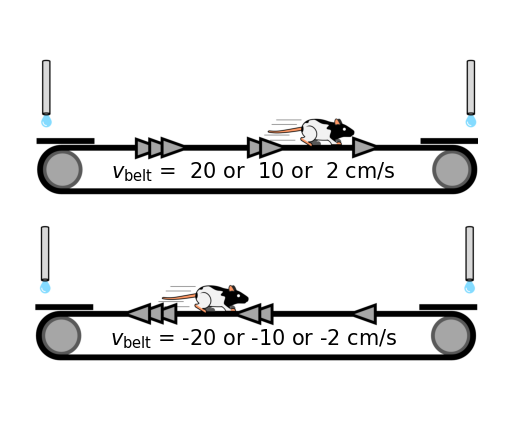

In [ ]:
def Figure2J(ax=None, path=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    if path is None:
        path = "/home/david/Desktop/code/Figures/2Erun.png"

    img = plt.imread(path)
    img = img[:, 150:3075]
    ax.imshow(img)
    ax.axis("off")
    ax.text(s=r'$v_{\mathrm{belt}}$ =  20 or  10 or  2 cm/s', x=img.shape[1]/2, y=930, ha="center", va="center", fontsize=5)
    ax.text(s=r'$v_{\mathrm{belt}}$ = -20 or -10 or -2 cm/s', x=img.shape[1]/2, y=2020, ha="center", va="center", fontsize=5)

fig, ax = plt.subplots(1, 1, figsize=(cm2inch(4), cm2inch(4)))
Figure2J(ax=ax)

# 2KLM fit results vbelt

p_value_20_0: 0.5846 p_value_0_rev20: 0.0013 p_value_20_rev20: 0.0127
p_value_20_0: 0.0302 p_value_0_rev20: 0.0704 p_value_20_rev20: 0.6047
p_value_20_0: 0.1319 p_value_0_rev20: 0.9122 p_value_20_rev20: 0.1449


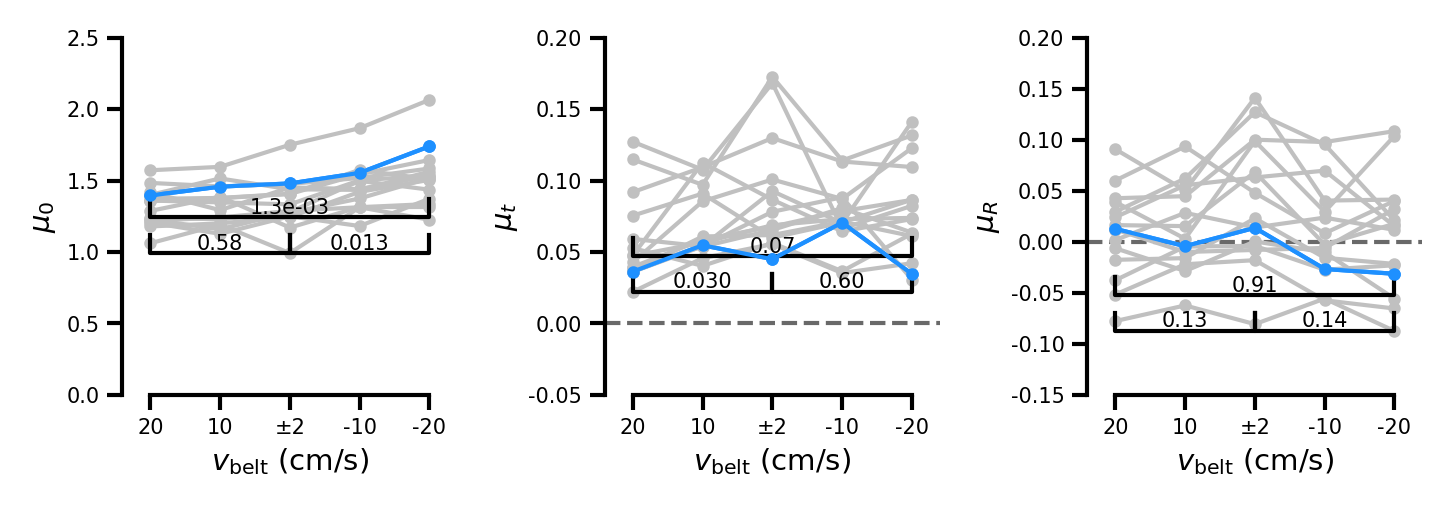

In [ ]:
def Figure2K(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, mu_0, _, _, _, _, _ = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [mu_0[animal]["20"], mu_0[animal]["10"], mu_0[animal]["2"], mu_0[animal]["rev10"], mu_0[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=2, linestyle=lines[brainstatus[animal]])
    
        if animal == "RatM00":
            ax.plot([0, 1, 2, 3, 4], [mu_0[animal]["20"], mu_0[animal]["10"], mu_0[animal]["2"], mu_0[animal]["rev10"], mu_0[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=2, linestyle=lines[brainstatus[animal]], zorder=10)
    
    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    _ = r'$v_{\mathrm{belt}}$'
    ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(0, 2.5)
    ax.set_ylabel(r'$\mu_0$')
    # ax.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5, zorder=0)
    space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_0, ax=ax, dist_or_tm='tm')
    permutation_test_vbelt(mu_0, ax=ax, num_permutations=10000)

def Figure2L(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, mu_t, _, _, _, _ = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [mu_t[animal]["20"], mu_t[animal]["10"], mu_t[animal]["2"], mu_t[animal]["rev10"], mu_t[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=2, linestyle=lines[brainstatus[animal]])
        if animal == "RatM00":
            ax.plot([0, 1, 2, 3, 4], [mu_t[animal]["20"], mu_t[animal]["10"], mu_t[animal]["2"], mu_t[animal]["rev10"], mu_t[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=2, linestyle=lines[brainstatus[animal]], zorder=10)

    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    _ = r'$v_{\mathrm{belt}}$'
    ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(-.05, .2)
    ax.set_ylabel(r'$\mu_t$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, alpha=1, zorder=0)
    space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_t, ax=ax, dist_or_tm='tm')
    permutation_test_vbelt(mu_t, ax=ax, num_permutations=10000)

def Figure2M(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, mu_R, _, _, _ = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [mu_R[animal]["20"], mu_R[animal]["10"], mu_R[animal]["2"], mu_R[animal]["rev10"], mu_R[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=2, linestyle=lines[brainstatus[animal]])
        if animal == "RatM00":
            ax.plot([0, 1, 2, 3, 4], [mu_R[animal]["20"], mu_R[animal]["10"], mu_R[animal]["2"], mu_R[animal]["rev10"], mu_R[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=2, linestyle=lines[brainstatus[animal]], zorder=10)
    
    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    _ = r'$v_{\mathrm{belt}}$'
    ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(-.15, .2)
    ax.set_ylabel(r'$\mu_R$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, alpha=1, zorder=0)
    space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_R, ax=ax, dist_or_tm='tm')
    permutation_test_vbelt(mu_R, ax=ax, num_permutations=10000)

fig, axs = plt.subplots(1, 3, figsize=(cm2inch(12), cm2inch(4)))
Figure2K(axs[0])
Figure2L(axs[1])
Figure2M(axs[2])

# 2N mean run speed vbelt

p_value_20_0: 0.0 p_value_0_rev20: 0.0 p_value_20_rev20: 0.0


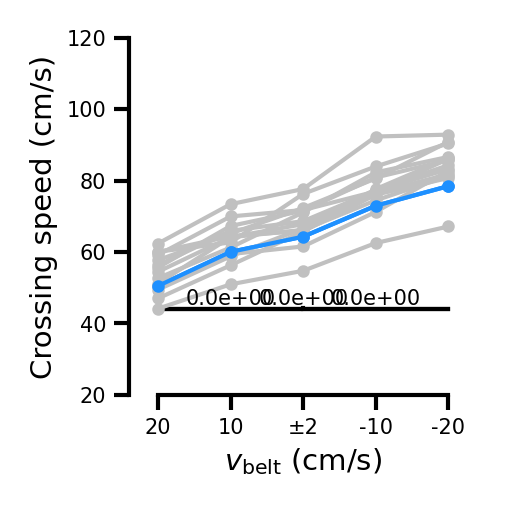

In [ ]:
def Figure2N(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    conds = ["20", "10", "2", "rev10", "rev20"]
    run_speeds = {k: {a: [] for a in conds} for k in animalList}
    run_speeds2 = {k: {a: [] for a in conds} for k in animalList}

    for cond, sessionlist in zip(conds, [TM20, TM10, TM2, TMrev10, TMrev20]):
        for animal in animalList:
            for session in matchsession(animal, sessionlist):
                params = get_from_pickle(root, animal, session, name="params.p")
                for elem in sequence[animal, session]:
                    if get_block(sequence[animal, session][elem][0]) <= 1:
                        if sequence[animal, session][elem][1] == 'run':
                            tm_speed = params['treadmillSpeed'][get_block(sequence[animal, session][elem][0])]
                            run_speeds[animal][cond].append(abs(sequence[animal, session][elem][-1]) - tm_speed)

    for animal in animalList:
        for cond in conds:
            run_speeds2[animal][cond] = np.median(run_speeds[animal][cond])
    permutation_test_vbelt(run_speeds2, ax=ax, num_permutations=10000)
    # effect_of_condition(run_speeds2, conds=conds, name='runspeed')
    # plotmedian(run_speeds2, ax=ax, dist_or_tm='tm')

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [np.median(run_speeds[animal][cond]) for cond in conds], color=rat_markers[animal][0],
                marker=rat_markers[animal][1], markersize=2)
        
        if animal == 'RatM00':
            pickle.dump([np.median(run_speeds[animal][cond]) for cond in conds], open("picklejar/example_rat_run_speeds_tm.p", "wb"))
            ax.plot([0, 1, 2, 3, 4], [np.median(run_speeds[animal][cond]) for cond in conds], color=rat_markers[animal][0],
                marker=rat_markers[animal][1], markersize=2, zorder=10)
                
    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    _ = r'$v_{\mathrm{belt}}$'
    ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(20, 120)
    ax.set_yticks([20, 40, 60, 80, 100, 120])
    ax.set_ylabel("Crossing speed (cm/s)")
    space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1)

fig, ax = plt.subplots(1, 1, figsize=(cm2inch(4), cm2inch(4)))
Figure2N(ax=ax)

# Figure 2

In [ ]:

# fig = plt.figure(figsize=(cm2inch(18), cm2inch(12)), constrained_layout=True, facecolor='w', dpi=600)

# gs0 = fig.add_gridspec(5, 1, wspace=.5, hspace=.5, height_ratios=[9, 1, 9, 1, 9])

# row1 = gs0[0].subgridspec(1, 7, width_ratios=[1, .01, 2, 2, 2, .1, 2])
# explanation_mu = plt.subplot(row1[0, 0])
# explanation_mu_0 = plt.subplot(row1[0, 2])
# explanation_mu_t = plt.subplot(row1[0, 3])
# explanation_mu_R = plt.subplot(row1[0, 4])
# modeldata = plt.subplot(row1[0, 6])

# row2 = gs0[2].subgridspec(1, 5, width_ratios=[3, 2, 2, 2, 2])
# schematic_distances = plt.subplot(row2[0, 0])
# fit_mu_0_distance = plt.subplot(row2[0, 1])
# fit_mu_t_distance = plt.subplot(row2[0, 2])
# fit_mu_R_distance = plt.subplot(row2[0, 3])
# speed_distance = plt.subplot(row2[0, 4])

# row3 = gs0[4].subgridspec(1, 5, width_ratios=[3, 2, 2, 2, 2])
# schematic_vbelts = plt.subplot(row3[0, 0])
# fit_mu_0_vbelt = plt.subplot(row3[0, 1])
# fit_mu_t_vbelt = plt.subplot(row3[0, 2])
# fit_mu_R_vbelt = plt.subplot(row3[0, 3])
# speed_vbelt = plt.subplot(row3[0, 4])

# figuresLabels={"A":[0.00, 1.00], "B":[0.16, 1.00], "C":[0.78, 1.00],
#                "D":[0.00, 0.65], #"F":[0.22, 0.65], "G":[0.415, 0.65], "H":[0.61, 0.65], "I":[0.805, 0.65],
#                "E":[0.00, 0.31], #"K":[0.22, 0.31], "L":[0.415, 0.31], "M":[0.61, 0.31], "N":[0.805, 0.31]
#                }

# for label,coordinates in sorted(figuresLabels.items()):
#     fig.text(coordinates[0], coordinates[1],
#              label, figure=fig, 
#              weight='bold', fontsize=7, ha='left', va='bottom')

# plot_mu(explanation_mu)
# Figure2A(ax=explanation_mu_0)
# Figure2B(ax=explanation_mu_t)
# Figure2C(ax=explanation_mu_R)
# Figure2D(ax=modeldata)

# Figure2E(ax=schematic_distances)
# Figure2F(ax=fit_mu_0_distance)
# Figure2G(ax=fit_mu_t_distance)
# Figure2H(ax=fit_mu_R_distance)
# Figure2I(ax=speed_distance)

# Figure2J(ax=schematic_vbelts)
# Figure2K(ax=fit_mu_0_vbelt)
# Figure2L(ax=fit_mu_t_vbelt)
# Figure2M(ax=fit_mu_R_vbelt)
# Figure2N(ax=speed_vbelt)



# h, w = 0.06, 0.0125

# cbarA = fig.add_axes([.2257, .9, w, h])
# plot_colorbar(ax=cbarA, label=r'$\mu_0$', cmap='winter', labels=[1.5, 0, 3.75])

# cbarB = fig.add_axes([.4308, .9, w, h])
# plot_colorbar(ax=cbarB, label=r'$\mu_t$', cmap='winter', labels=[0, 0, .45])

# cbarC = fig.add_axes([.6362, .9, w, h])
# plot_colorbar(ax=cbarC, label=r'$\mu_R$', show_zero=150, cmap='winter', labels=[-0.5, 0, 2.5])


# plt.text(s=r'$\mu(t, R) = \mu_0 + \mu_t t + \mu_R R$', 
#          x=0.5, y=1, ha="center", va="bottom", fontsize=7, 
#         #  bbox=dict(facecolor='none', edgecolor='k', alpha=1, boxstyle='round, pad=.25', linewidth=.5), 
#          transform=plt.gcf().transFigure)


# # plt.savefig("/home/david/Desktop/code/Figure_2.pdf", facecolor='w', 
# #         edgecolor='none', bbox_inches='tight', format="pdf", dpi=600)

1.3731192071741753 0.0612856829746447 0.00633329065966956 0.0 0.0 0.0
p_value_60_90: 0.0 p_value_60_120: 0.0 p_value_90_120: 0.0
p_value_60_90: 0.0026 p_value_60_120: 0.0274 p_value_90_120: 0.8658
p_value_60_90: 0.1161 p_value_60_120: 0.2895 p_value_90_120: 0.9859
p_value_60_90: 0.0 p_value_60_120: 0.0 p_value_90_120: 0.0
p_value_20_0: 0.5851 p_value_0_rev20: 0.0014 p_value_20_rev20: 0.0124
p_value_20_0: 0.0299 p_value_0_rev20: 0.0737 p_value_20_rev20: 0.6113
p_value_20_0: 0.128 p_value_0_rev20: 0.9123 p_value_20_rev20: 0.1394
p_value_20_0: 0.0 p_value_0_rev20: 0.0 p_value_20_rev20: 0.0001


Text(0.5, 1, '$\\mu(t, R) = \\mu_0 + \\mu_t t + \\mu_R R$')

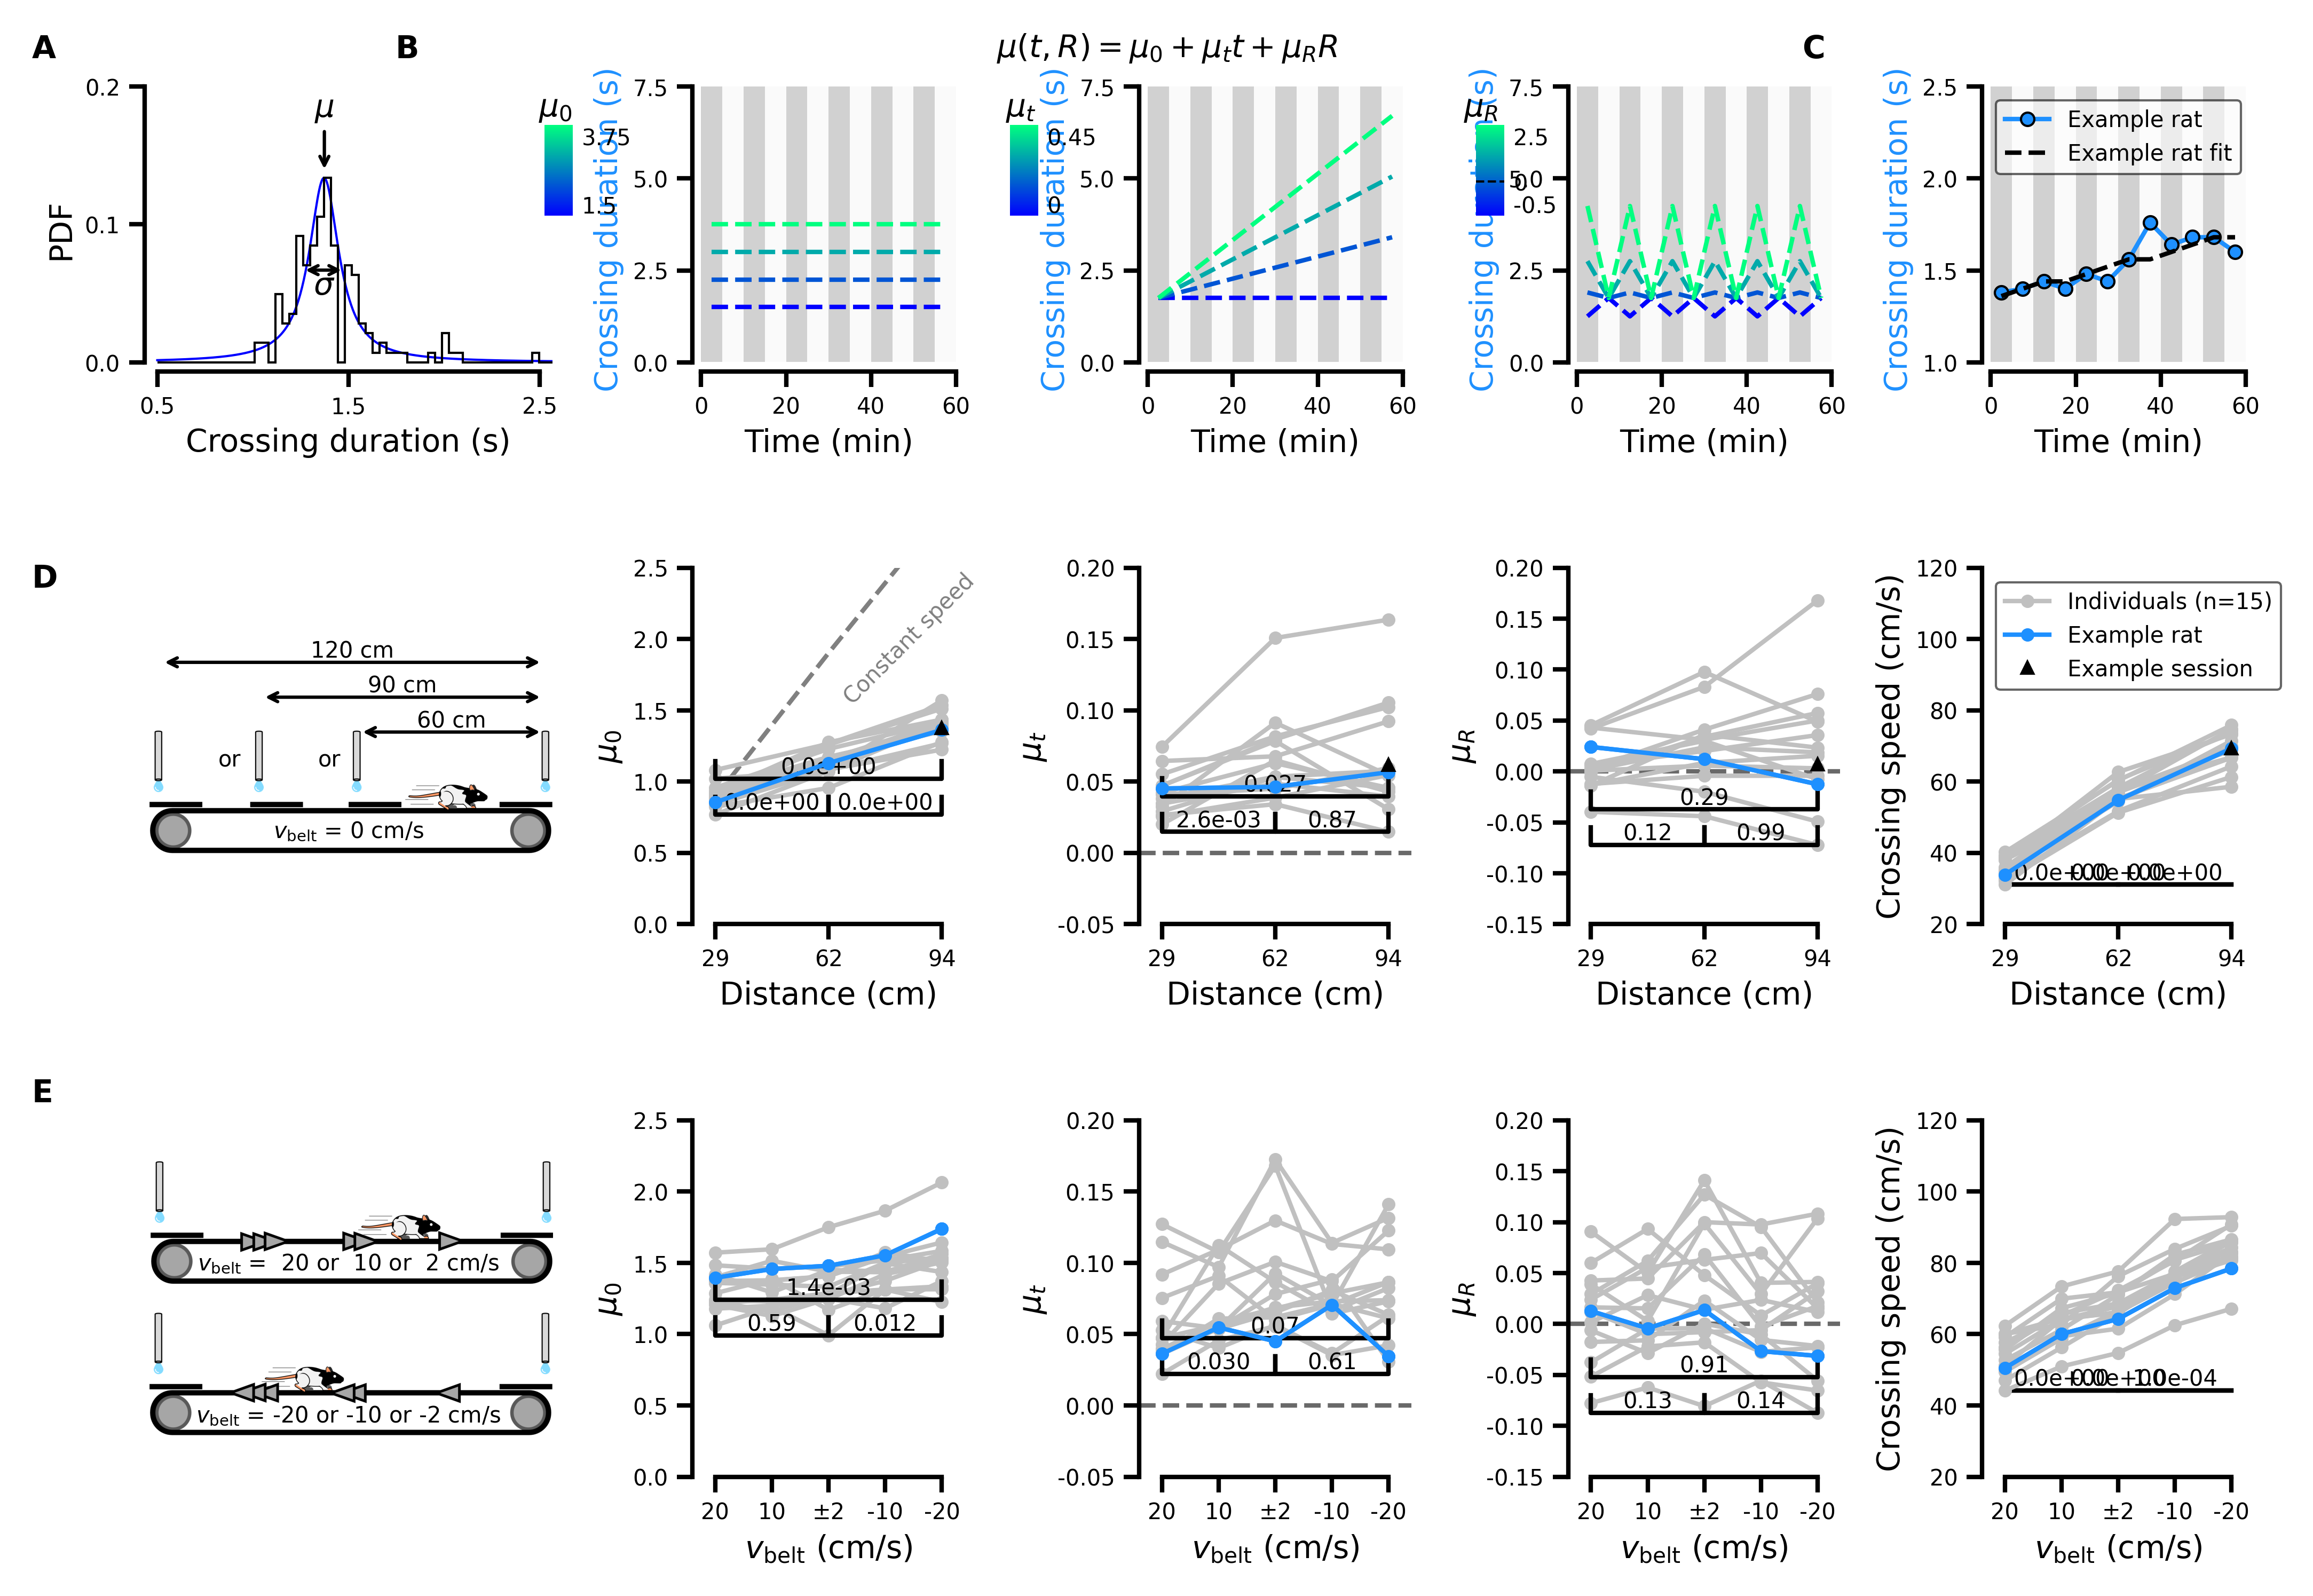

In [ ]:

fig = plt.figure(figsize=(cm2inch(18), cm2inch(12)), constrained_layout=True, facecolor='w', dpi=600)

gs0 = fig.add_gridspec(5, 5, wspace=.5, hspace=.5, 
                       height_ratios=[8, 1, 10, 1, 10], width_ratios=[3, 2, 2, 2, 2])


explanation_mu = plt.subplot(gs0[0, 0])
explanation_mu_0 = plt.subplot(gs0[0, 1])
explanation_mu_t = plt.subplot(gs0[0, 2])
explanation_mu_R = plt.subplot(gs0[0, 3])
modeldata = plt.subplot(gs0[0, 4])


schematic_distances = plt.subplot(gs0[2, 0])
fit_mu_0_distance = plt.subplot(gs0[2, 1])
fit_mu_t_distance = plt.subplot(gs0[2, 2])
fit_mu_R_distance = plt.subplot(gs0[2, 3])
speed_distance = plt.subplot(gs0[2, 4])


schematic_vbelts = plt.subplot(gs0[4, 0])
fit_mu_0_vbelt = plt.subplot(gs0[4, 1])
fit_mu_t_vbelt = plt.subplot(gs0[4, 2])
fit_mu_R_vbelt = plt.subplot(gs0[4, 3])
speed_vbelt = plt.subplot(gs0[4, 4])

figuresLabels={"A":[0.00, 1.00], "B":[0.16, 1.00], "C":[0.78, 1.00],
               "D":[0.00, 0.65], #"F":[0.22, 0.65], "G":[0.415, 0.65], "H":[0.61, 0.65], "I":[0.805, 0.65],
               "E":[0.00, 0.31], #"K":[0.22, 0.31], "L":[0.415, 0.31], "M":[0.61, 0.31], "N":[0.805, 0.31]
               }

for label,coordinates in sorted(figuresLabels.items()):
    fig.text(coordinates[0], coordinates[1],
             label, figure=fig, 
             weight='bold', fontsize=7, ha='left', va='bottom')

plot_mu(explanation_mu)
Figure2A(ax=explanation_mu_0)
Figure2B(ax=explanation_mu_t)
Figure2C(ax=explanation_mu_R)
Figure2D(ax=modeldata)

Figure2E(ax=schematic_distances)
Figure2F(ax=fit_mu_0_distance)
Figure2G(ax=fit_mu_t_distance)
Figure2H(ax=fit_mu_R_distance)
Figure2I(ax=speed_distance)

Figure2J(ax=schematic_vbelts)
Figure2K(ax=fit_mu_0_vbelt)
Figure2L(ax=fit_mu_t_vbelt)
Figure2M(ax=fit_mu_R_vbelt)
Figure2N(ax=speed_vbelt)



h, w = 0.06, 0.0125

cbarA = fig.add_axes([.2257, .9, w, h])
plot_colorbar(ax=cbarA, label=r'$\mu_0$', cmap='winter', labels=[1.5, 0, 3.75])

cbarB = fig.add_axes([.4308, .9, w, h])
plot_colorbar(ax=cbarB, label=r'$\mu_t$', cmap='winter', labels=[0, 0, .45])

cbarC = fig.add_axes([.6362, .9, w, h])
plot_colorbar(ax=cbarC, label=r'$\mu_R$', show_zero=150, cmap='winter', labels=[-0.5, 0, 2.5])


plt.text(s=r'$\mu(t, R) = \mu_0 + \mu_t t + \mu_R R$', 
         x=0.5, y=1, ha="center", va="bottom", fontsize=7, 
        #  bbox=dict(facecolor='none', edgecolor='k', alpha=1, boxstyle='round, pad=.25', linewidth=.5), 
         transform=plt.gcf().transFigure)


# plt.savefig("/home/david/Desktop/code/Figure_2.pdf", facecolor='w', 
#         edgecolor='none', bbox_inches='tight', format="pdf", dpi=600)

In [ ]:
<

SyntaxError: invalid syntax (4056019114.py, line 1)

In [ ]:
# def effort_cost(T, D=1, alpha=1, vbelt=0):
#     return alpha * ((D**2 / T) - 2*vbelt*D + vbelt**2 * T)

def effort_cost(T, D=1, alpha=1, vbelt=0, power_effort=1):
    np.seterr(divide='ignore', invalid='ignore')
    vmax = (D - vbelt * T) / (T)
    return alpha * T * (vmax ** power_effort)

def time_cost(T, beta=1, power_time=1):
    return beta*T ** power_time


def plot_model(D=1, vbelt=0, alpha=1, beta=1, power_effort=2, power_time=3):
    fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    T = np.linspace(0, 2, 100)
    ax.plot(T, effort_cost(T, D, alpha, vbelt, power_effort), label=r'$C_v$', color='r')
    ax.plot(T, time_cost(T, beta, power_time), label=r'$C_t$', color='g')
    ax.plot(T, effort_cost(T, D, alpha, vbelt, power_effort) + time_cost(T, beta, power_time), label=r'$C_v + C_t$', color='k')
    # argmin of total cost
    ax.plot(T[np.nanargmin(effort_cost(T, D, alpha, vbelt, power_effort) + time_cost(T, beta, power_time))], 
            np.nanmin(effort_cost(T, D, alpha, vbelt, power_effort) + time_cost(T, beta, power_time)),
            'o', color='k')#, label=r'$T^*$')

    ax.set_xlabel('Crossing duration (s)')
    ax.set_ylabel('Cost (a.u.)')
    ax.legend()
    ax.set_ylim(-.5, 5)
    ax.set_xlim(-.25, 2.25)
    topt = T[np.nanargmin(effort_cost(T, D, alpha, vbelt, power_effort) + time_cost(T, beta, power_time))]
    ax.set_xticks([0, topt, 1, 2])
    ax.set_xticklabels([0, r'$T_{opt}$', 1, 2])

    ax.spines['left'].set_bounds(0, 5)
    ax.spines['bottom'].set_bounds(0, 2)


interactive_plot = interactive(plot_model, D=(0, 2, .1), vbelt=(-.2, .2, 0.01), 
alpha=(0, 50.0, 0.5), beta=(0, 5, 0.5), 
power_effort=(0, 5, 0.1), power_time=(0, 5, 0.1))
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='D', max=2.0), FloatSlider(value=0.0, description='vb…

# suppl

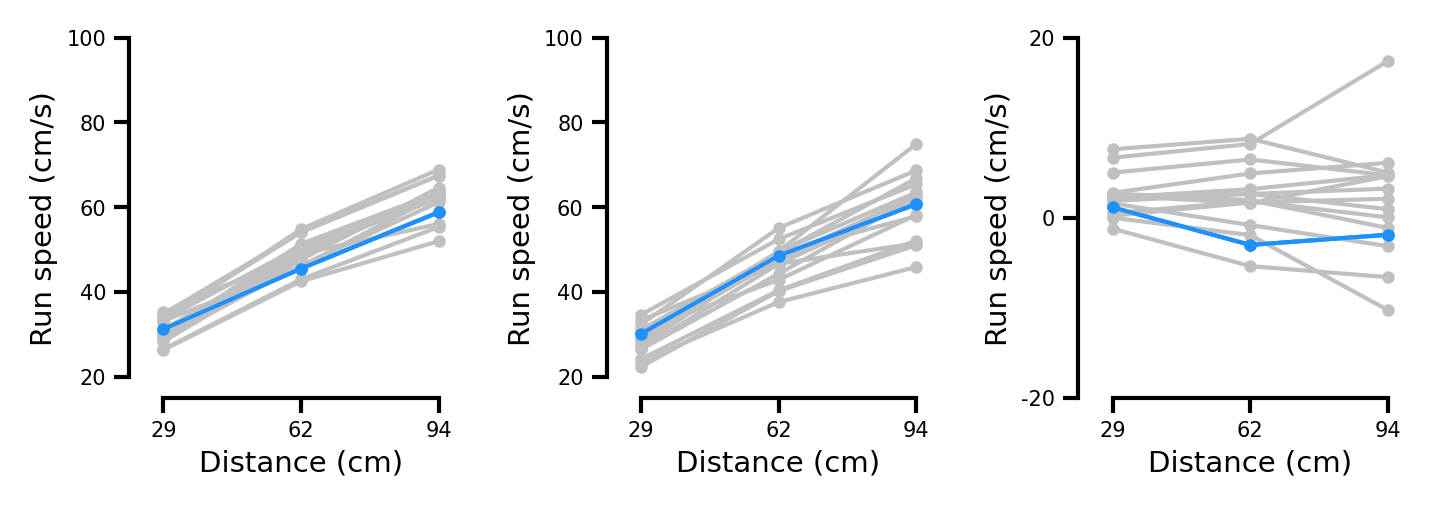

In [ ]:
def FigureS2I(axs=None):
    if axs is None:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    conds = ["60", "90", "120"]
    run_speeds90 = {k: {a: [] for a in animalList} for k in conds}
    run_speeds10 = {k: {a: [] for a in animalList} for k in conds}

    for cond, sessionlist in zip(conds, [dist60, dist90, dist120]):
        for animal in animalList:
            for session in matchsession(animal, sessionlist):
                params = get_from_pickle(root, animal, session, name="params.p")
                for elem in sequence[animal, session]:
                    if sequence[animal, session][elem][1] == 'run':
                        tm_speed = params['treadmillSpeed'][get_block(sequence[animal, session][elem][0])]
                        if get_block(sequence[animal, session][elem][0]) %2 == 0:
                            run_speeds90[cond][animal].append(abs(sequence[animal, session][elem][-1]) - tm_speed)
                        else:
                            run_speeds10[cond][animal].append(abs(sequence[animal, session][elem][-1]) - tm_speed)


    for animal in animalList:
        axs[0].plot([0, 1, 2], [np.median(run_speeds90[cond][animal]) for cond in conds], color=rat_markers[animal][0],
                marker=rat_markers[animal][1], markersize=2)
        axs[1].plot([0, 1, 2], [np.median(run_speeds10[cond][animal]) for cond in conds], color=rat_markers[animal][0],
                marker=rat_markers[animal][1], markersize=2)

        axs[2].plot([0, 1, 2], [np.median(run_speeds90[cond][animal]) - np.median(run_speeds10[cond][animal]) for cond in conds], color=rat_markers[animal][0],
                marker=rat_markers[animal][1], markersize=2)

        if animal == "RatM00":
            axs[0].plot([0, 1, 2], [np.median(run_speeds90[cond][animal]) for cond in conds], color=rat_markers[animal][0],
                    marker=rat_markers[animal][1], markersize=2, zorder=10)
            axs[1].plot([0, 1, 2], [np.median(run_speeds10[cond][animal]) for cond in conds], color=rat_markers[animal][0],
                    marker=rat_markers[animal][1], markersize=2, zorder=10)
            
            axs[2].plot([0, 1, 2], [np.median(run_speeds90[cond][animal]) - np.median(run_speeds10[cond][animal]) for cond in conds], color=rat_markers[animal][0],
                    marker=rat_markers[animal][1], markersize=2, zorder=10)



    # animal='RatF02'
    # session='RatF02_2021_07_22_18_14_16'
    # example_session_run_speeds = []
    # params = get_from_pickle(root, animal, session, name="params.p")
    # for elem in sequence[animal, session]:
    #     if sequence[animal, session][elem][1] == 'run':
    #         tm_speed = params['treadmillSpeed'][get_block(sequence[animal, session][elem][0])]
    #         example_session_run_speeds.append(abs(sequence[animal, session][elem][-1]) - tm_speed)

    # ax.plot(2, np.median(example_session_run_speeds), color='black', marker='^', zorder=10, markersize=2, linewidth=0)

    for ax in axs:
        ax.set_xlim(-0.25, 2.25)
        ax.set_xticks([0, 1, 2])
        ax.set_xticklabels(["29", "62", "94"])
        ax.set_xlabel("Distance (cm)")


        ax.set_ylim(15, 100)
        ax.set_yticks([20, 40, 60, 80, 100])
        ax.set_ylabel("Run speed (cm/s)")


        ax.spines['left'].set_bounds(20, 100)
        ax.spines['bottom'].set_bounds(0, 2)

    axs[2].set_ylim(-20, 20)
    axs[2].spines['left'].set_bounds(-20, 20)
    axs[2].set_yticks([-20, 00, 20])

fig, axs = plt.subplots(1, 3, figsize=(cm2inch(12), cm2inch(4)))
FigureS2I(axs=axs)

[39.58839798912963, 56.94630658669116, 74.03565885278887]


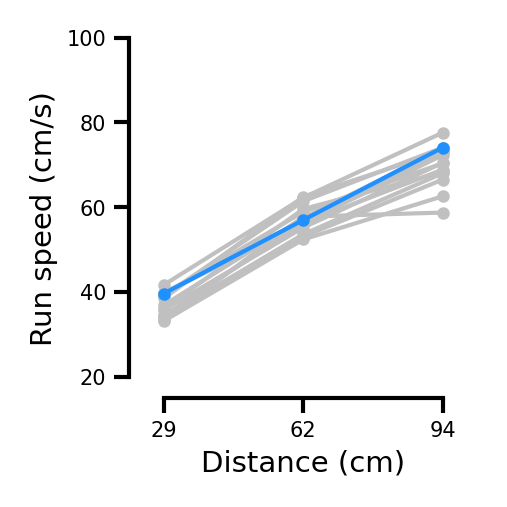

In [ ]:
def Figure2I(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    conds = ["60", "90", "120"]
    run_speeds = {k: {a: [] for a in animalList} for k in conds}

    for cond, sessionlist in zip(conds, [dist60, dist90, dist120]):
        for animal in animalList:
            for session in matchsession(animal, sessionlist):
                params = get_from_pickle(root, animal, session, name="params.p")
                for elem in sequence[animal, session]:
                    if get_block(sequence[animal, session][elem][0]) == 0:

                        if sequence[animal, session][elem][1] == 'run':
                            tm_speed = params['treadmillSpeed'][get_block(sequence[animal, session][elem][0])]
                            run_speeds[cond][animal].append(abs(sequence[animal, session][elem][-1]) - tm_speed)


    for animal in animalList:
        ax.plot([0, 1, 2], [np.median(run_speeds[cond][animal]) for cond in conds], color=rat_markers[animal][0],
                marker=rat_markers[animal][1], markersize=2)

        if animal == "RatM00":
            print([np.median(run_speeds[cond][animal]) for cond in conds])
            ax.plot([0, 1, 2], [np.median(run_speeds[cond][animal]) for cond in conds], color=rat_markers[animal][0],
                    marker=rat_markers[animal][1], markersize=2, zorder=10)


    ax.set_xlim(-0.25, 2.25)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    ax.set_xlabel("Distance (cm)")


    ax.set_ylim(15, 100)
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_ylabel("Run speed (cm/s)")


    ax.spines['left'].set_bounds(20, 100)
    ax.spines['bottom'].set_bounds(0, 2)

fig, ax = plt.subplots(1, 1, figsize=(cm2inch(4), cm2inch(4)))
Figure2I(ax=ax)